### Data Preparation and preprocessing
features will be the last 9 integers in each row, and the labels will be the first integer in each row

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load your data
df = pd.read_excel('C:/Users/ailaty/Desktop/Python Scripts/CO2emmision prediction/serial_data.xlsx')


# Assuming your data is in a column named 'Values'
# Splitting the 'Values' column by comma, accounting for the initial 'CO2 (ppm): ' string
data = df['Values'].str.split(',', expand=True)

# Handling the 'CO2 (ppm): ' prefix and considering the first value after the prefix as the label
labels = data.iloc[:, 1]  # Second column (label)
features = data.iloc[:, 2:]  # Remaining columns (features)

# Rename columns for clarity (optional step)
features.columns = [f'Feature_{i}' for i in range(1, 10)]
labels.name = 'Label'

# Concatenate features and labels into a new DataFrame
processed_data = pd.concat([features, labels], axis=1)

# Save the processed data to a new CSV file
processed_data.to_csv('processed_data.csv', index=False)

In [13]:
processed_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Label
0,597,676,409,410,407,544,410,407,467,530
1,567,671,408,409,407,541,410,407,464,518
2,558,670,408,409,406,541,409,407,463,517
3,548,668,408,409,406,537,409,407,460,511
4,543,666,408,409,403,534,408,407,459,508


### Model Selection
* Linear Regression: A simple and interpretable model that assumes a linear relationship between features and the target variable.
* Decision Trees or Random Forests: These models can capture nonlinear relationships and handle interactions between features well.
* Support Vector Machines (SVM): Good for small datasets and can capture complex relationships.

### Model Training
Split the dataset

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Load your processed data
processed_data = pd.read_csv('processed_data.csv')

# Assuming 'Label' column is your target variable and the rest are features
X = processed_data.drop('Label', axis=1)  # Features
y = processed_data['Label']  # Target variable

# Splitting the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you have X_train (features for training), X_test (features for testing),
# y_train (target variable for training), y_test (target variable for testing)
# You can use these sets to train your model and evaluate its performance

In [18]:
# Initializing Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test) 

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.9832708120765146
R^2 Score: 0.9926913803194868


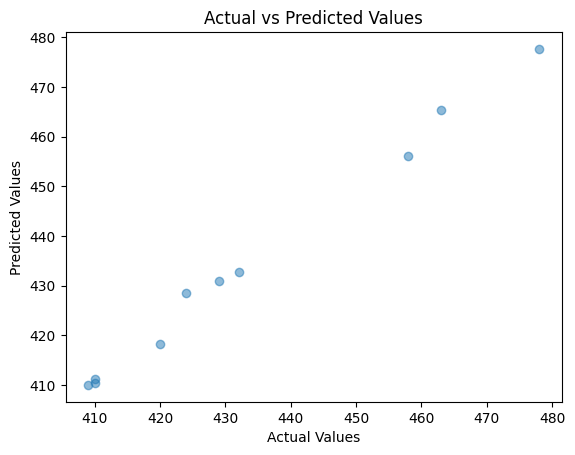

In [19]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

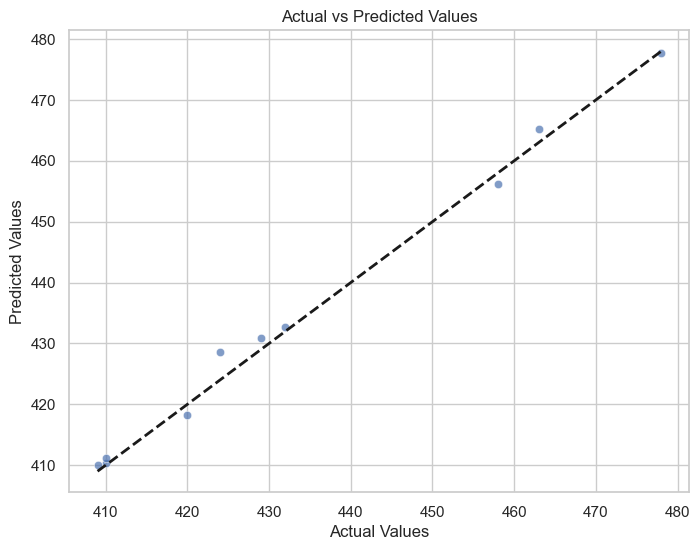

In [21]:
import seaborn as sns
# Set style for the plot
sns.set(style="whitegrid")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, and y_test are already defined from previous steps

# Initializing Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Training the model
tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluating the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Model:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R^2 Score: {r2_tree}")

Decision Tree Model:
Mean Squared Error: 17.6
R^2 Score: 0.9677070145501917


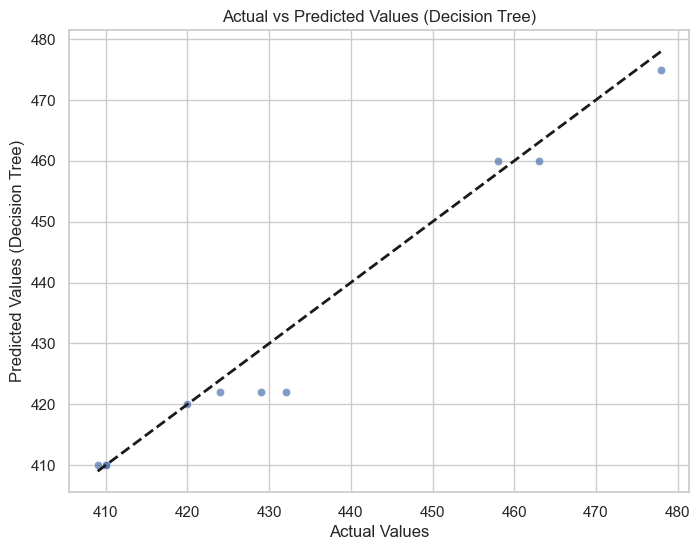

In [24]:
# Set style for the plot
sns.set(style="whitegrid")

# Scatter plot of actual vs predicted values for Decision Tree model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Decision Tree)')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.show()

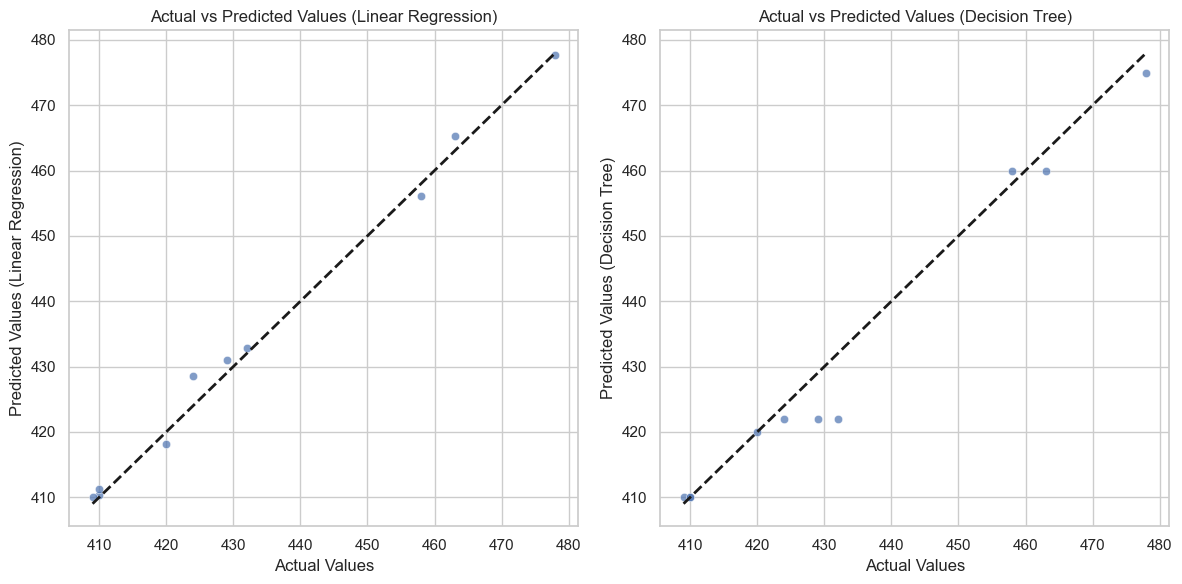

In [26]:
# Scatter plot comparing the two models
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Linear Regression Model plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Linear Regression)')
plt.title('Actual vs Predicted Values (Linear Regression)')

# Decision Tree Model plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (Decision Tree)')
plt.title('Actual vs Predicted Values (Decision Tree)')

plt.tight_layout()
plt.show()

In [27]:
from sklearn.svm import SVR
# Initialize and train an SVM regressor
svm_model = SVR(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM Model:")
print(f"Mean Squared Error: {mse_svm}")
print(f"R^2 Score: {r2_svm}")

SVM Model:
Mean Squared Error: 6.127863133772233
R^2 Score: 0.9887564207376521


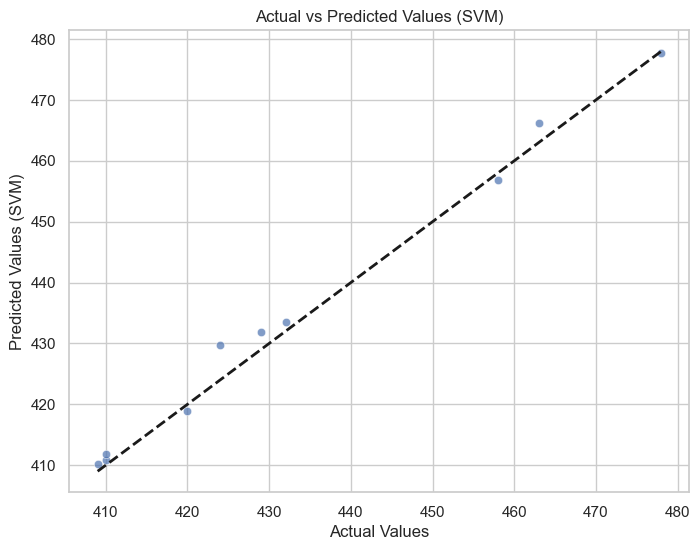

In [28]:
# Scatter plot comparing actual vs predicted values for SVM model
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.scatterplot(x=y_test, y=y_pred_svm, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values (SVM)')
plt.title('Actual vs Predicted Values (SVM)')
plt.show()

### Model Evaluation
Evaluate the model's performance using appropriate metrics such as Mean Squared Error (MSE), R-squared score, or Mean Absolute Error (MAE).